### Importing Libraries

In [1]:
import numpy as np
from cv2 import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Loading Dataset

In [2]:
train_dir = 'F:\\Project- Barbie with brain\\786787_1351797_bundle_archive\\train'
test_dir = 'F:\\Project- Barbie with brain\\786787_1351797_bundle_archive\\test'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(48,48),batch_size=64,color_mode="grayscale",class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(48,48),batch_size=64,color_mode="grayscale",class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Building CNN Model

In [3]:
models = Sequential()
models.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
models.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))
models.add(Dropout(0.25))
models.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))
models.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
models.add(MaxPooling2D(pool_size=(2, 2)))
models.add(Dropout(0.25))
models.add(Flatten())
models.add(Dense(1024, activation='relu'))
models.add(Dropout(0.5))
models.add(Dense(7, activation='softmax'))

### Training Data

In [4]:
models.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = models.fit_generator(train_generator,steps_per_epoch=28709 // 64,epochs=50,validation_data=test_generator,validation_steps=7178 // 64)

Epoch 1/50
448/448 [==============================] - 23s 52ms/step - loss: 1.7999 - accuracy: 0.2590 - val_loss: 1.7117 - val_accuracy: 0.3101
Epoch 2/50
448/448 [==============================] - 20s 45ms/step - loss: 1.6260 - accuracy: 0.3646 - val_loss: 1.5710 - val_accuracy: 0.4158
Epoch 3/50
448/448 [==============================] - 23s 52ms/step - loss: 1.5275 - accuracy: 0.4129 - val_loss: 1.4156 - val_accuracy: 0.4429
Epoch 4/50
448/448 [==============================] - 24s 52ms/step - loss: 1.4545 - accuracy: 0.4463 - val_loss: 1.4846 - val_accuracy: 0.4715
Epoch 5/50
448/448 [==============================] - 21s 47ms/step - loss: 1.3911 - accuracy: 0.4707 - val_loss: 1.2529 - val_accuracy: 0.4917
Epoch 6/50
448/448 [==============================] - 20s 45ms/step - loss: 1.3430 - accuracy: 0.4888 - val_loss: 1.6961 - val_accuracy: 0.5049
Epoch 7/50
448/448 [==============================] - 21s 46ms/step - loss: 1.2968 - accuracy: 0.5089 - val_loss: 1.3249 - val_accuracy:

### Finding Accuracy

In [5]:
print("Accuracy of our model on train data : " , models.evaluate(train_generator)[1]*100 , "%")

449/449 [==============================] - 8s 17ms/step
Accuracy of our model on train data :  98.16782474517822 %


In [6]:
print("Accuracy of our model on test data : " , models.evaluate(test_generator)[1]*100 , "%")

113/113 [==============================] - 2s 17ms/step
Accuracy of our model on test data :  62.301474809646606 %


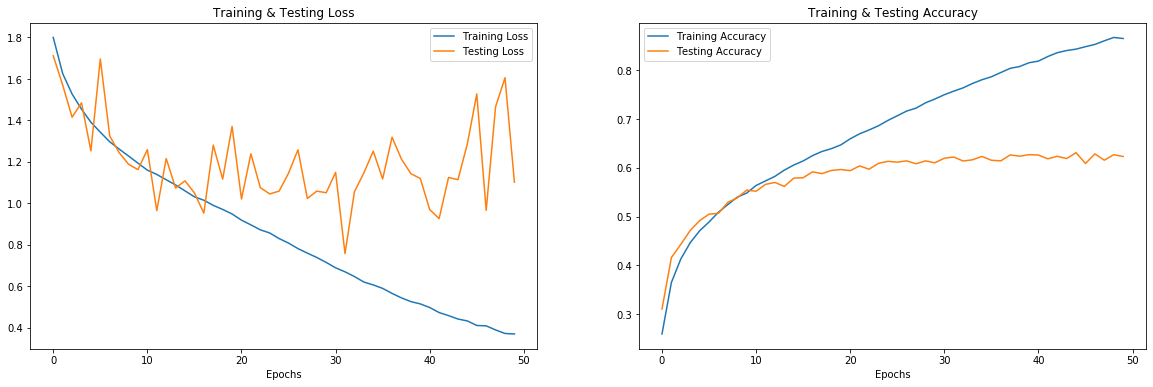

In [7]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = emotion_model_info.history['accuracy']
train_loss = emotion_model_info.history['loss']
test_acc = emotion_model_info.history['val_accuracy']
test_loss = emotion_model_info.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()